<a href="https://colab.research.google.com/github/babakaban/INSE6220/blob/main/INSE_6220_Babak_Bahari_Aban.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multiclass Classification with PyCaret:**

Multiclass classification is a form of supervised machine learning that aims to categorize occurrences into three or more distinct classes. Binary classification refers to the process of categorizing occurrences into one of two classes.

**Install PyCaret:**

In [86]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret[full]

In [87]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.2.0'

**Import Libraries:**

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [89]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


**Data Set:**

The Natural History Museum of Los Angeles County provides the dataset for this study, which may be obtained from the Kaggle website. The ecological categorization of birds and the length and diameter measurements of five different kinds of leg and wing bones are included in this data. The information contains 420 birds' ecological groupings as a class variable and 10 characteristics (bone measures), which are explained as follows.

class variable: Each bird has a label for its ecological group:
- SW: Swimming Birds
- W: Wading Birds
- T: Terrestrial Birds
- R: Raptors
- P: Scansorial Birds
- SO: Singing Birds

Features: Each bird is represented by 10 bone measures ,including the size of length and diameter of five bone types, and all measurements are in (mm):

- huml/humw: Length and Diameter of Humerus
- ulnal/ulnaw: Length and Diameter of Ulna
- feml/femw: Length and Diameter of Femur
- tibl/tibw: Length and Diameter of Tibiotarsus
- tarl/tarw: Length and Diameter of Tarsometatarsus

In [90]:
#read cvs file into dataframe
df = pd.read_csv('/content/sample_data/data set.csv')
df.head(25)

huml   humw   ulnal  ulnaw   feml  femw    tibl  tibw   tarl  tarw type
0    80.78   6.68   72.01   4.88  41.81  3.70    5.50  4.03  38.70  3.84   SW
1    88.91   6.63   80.53   5.59  47.04  4.30   80.22  4.51  41.50  4.01   SW
2    79.97   6.37   69.26   5.28  43.07  3.90   75.35  4.04  38.31  3.34   SW
3    77.65   5.70   65.76   4.77  40.04  3.52   69.17  3.40  35.78  3.41   SW
4    62.80   4.84   52.09   3.73  33.95  2.72   56.27  2.96  31.88  3.13   SW
5    61.92   4.78   50.46   3.47  49.52  4.41   56.95  2.73  29.07  2.83   SW
6    79.73   5.94   67.39   4.50  42.07  3.41   71.26  3.56  37.22  3.64   SW
7    86.98   5.68   74.52   4.55  44.46  3.78   76.02  3.81  37.94  3.81   SW
8   118.20   7.82  116.64   6.13  59.33  5.45  110.00  5.58  61.62  4.37   SW
9   145.00  10.42  144.00   7.05  70.96  7.44  120.00  7.31  78.67  6.34   SW
10  165.00  11.45  156.00   8.68  80.25  7.85  143.00  8.25  86.61  6.63   SW
11  186.00   9.83  152.00   8.76  56.02  7.02  185.00  8.07  90.80  4.59   SW
12  172.00   8.44  142.00   8.43  52.18  6.68  180.00  9.62  82.58  5.50   SW
13  148.91   6.78  121.35   6.50  44.29  6.33  155.00  6.68  73.71  4.24   SW
14  149.19   6.98  121.48   6.21  43.33  5.39  155.00  6.61  75.65  3.36   SW
15  140.59   6.59  115.97   5.81  39.75  5.61  166.00  7.83  74.86  3.52   SW
16  135.23   6.22  108.78   5.83  37.99  5.13  157.00  7.18  72.44  3.53   SW
17  124.53   6.01  100.37   5.82  34.54  5.43  145.00  7.12  65.92  3.28   SW
18  127.03   6.18  102.53   5.64  36.52  4.89  150.00  6.78  67.27  3.06   SW
19  106.02   4.47   95.79   4.33  41.96  4.80  129.59  6.94  70.29  3.35   SW
20  113.84   4.80  100.71   4.39  43.95  5.08  133.27  7.41  70.91  2.69   SW
21  108.62   5.04   97.70   4.66  45.08  5.78  128.00  7.14  65.48  4.25   SW
22  110.33   5.86   97.10   4.60  43.82  5.73  126.00  7.86  64.17  3.84   SW
23   63.62   3.42   59.00   2.75  30.16  2.92   74.66  4.38  39.26  1.97   SW
24   70.73   3.69   65.19   2.93  32.52  3.54   80.42  4.36  43.70  2.28   SW

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   huml    413 non-null    float64
 1   humw    413 non-null    float64
 2   ulnal   413 non-null    float64
 3   ulnaw   413 non-null    float64
 4   feml    413 non-null    float64
 5   femw    413 non-null    float64
 6   tibl    413 non-null    float64
 7   tibw    413 non-null    float64
 8   tarl    413 non-null    float64
 9   tarw    413 non-null    float64
 10  type    413 non-null    object 
dtypes: float64(10), object(1)
memory usage: 35.6+ KB


In [92]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [93]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis:**

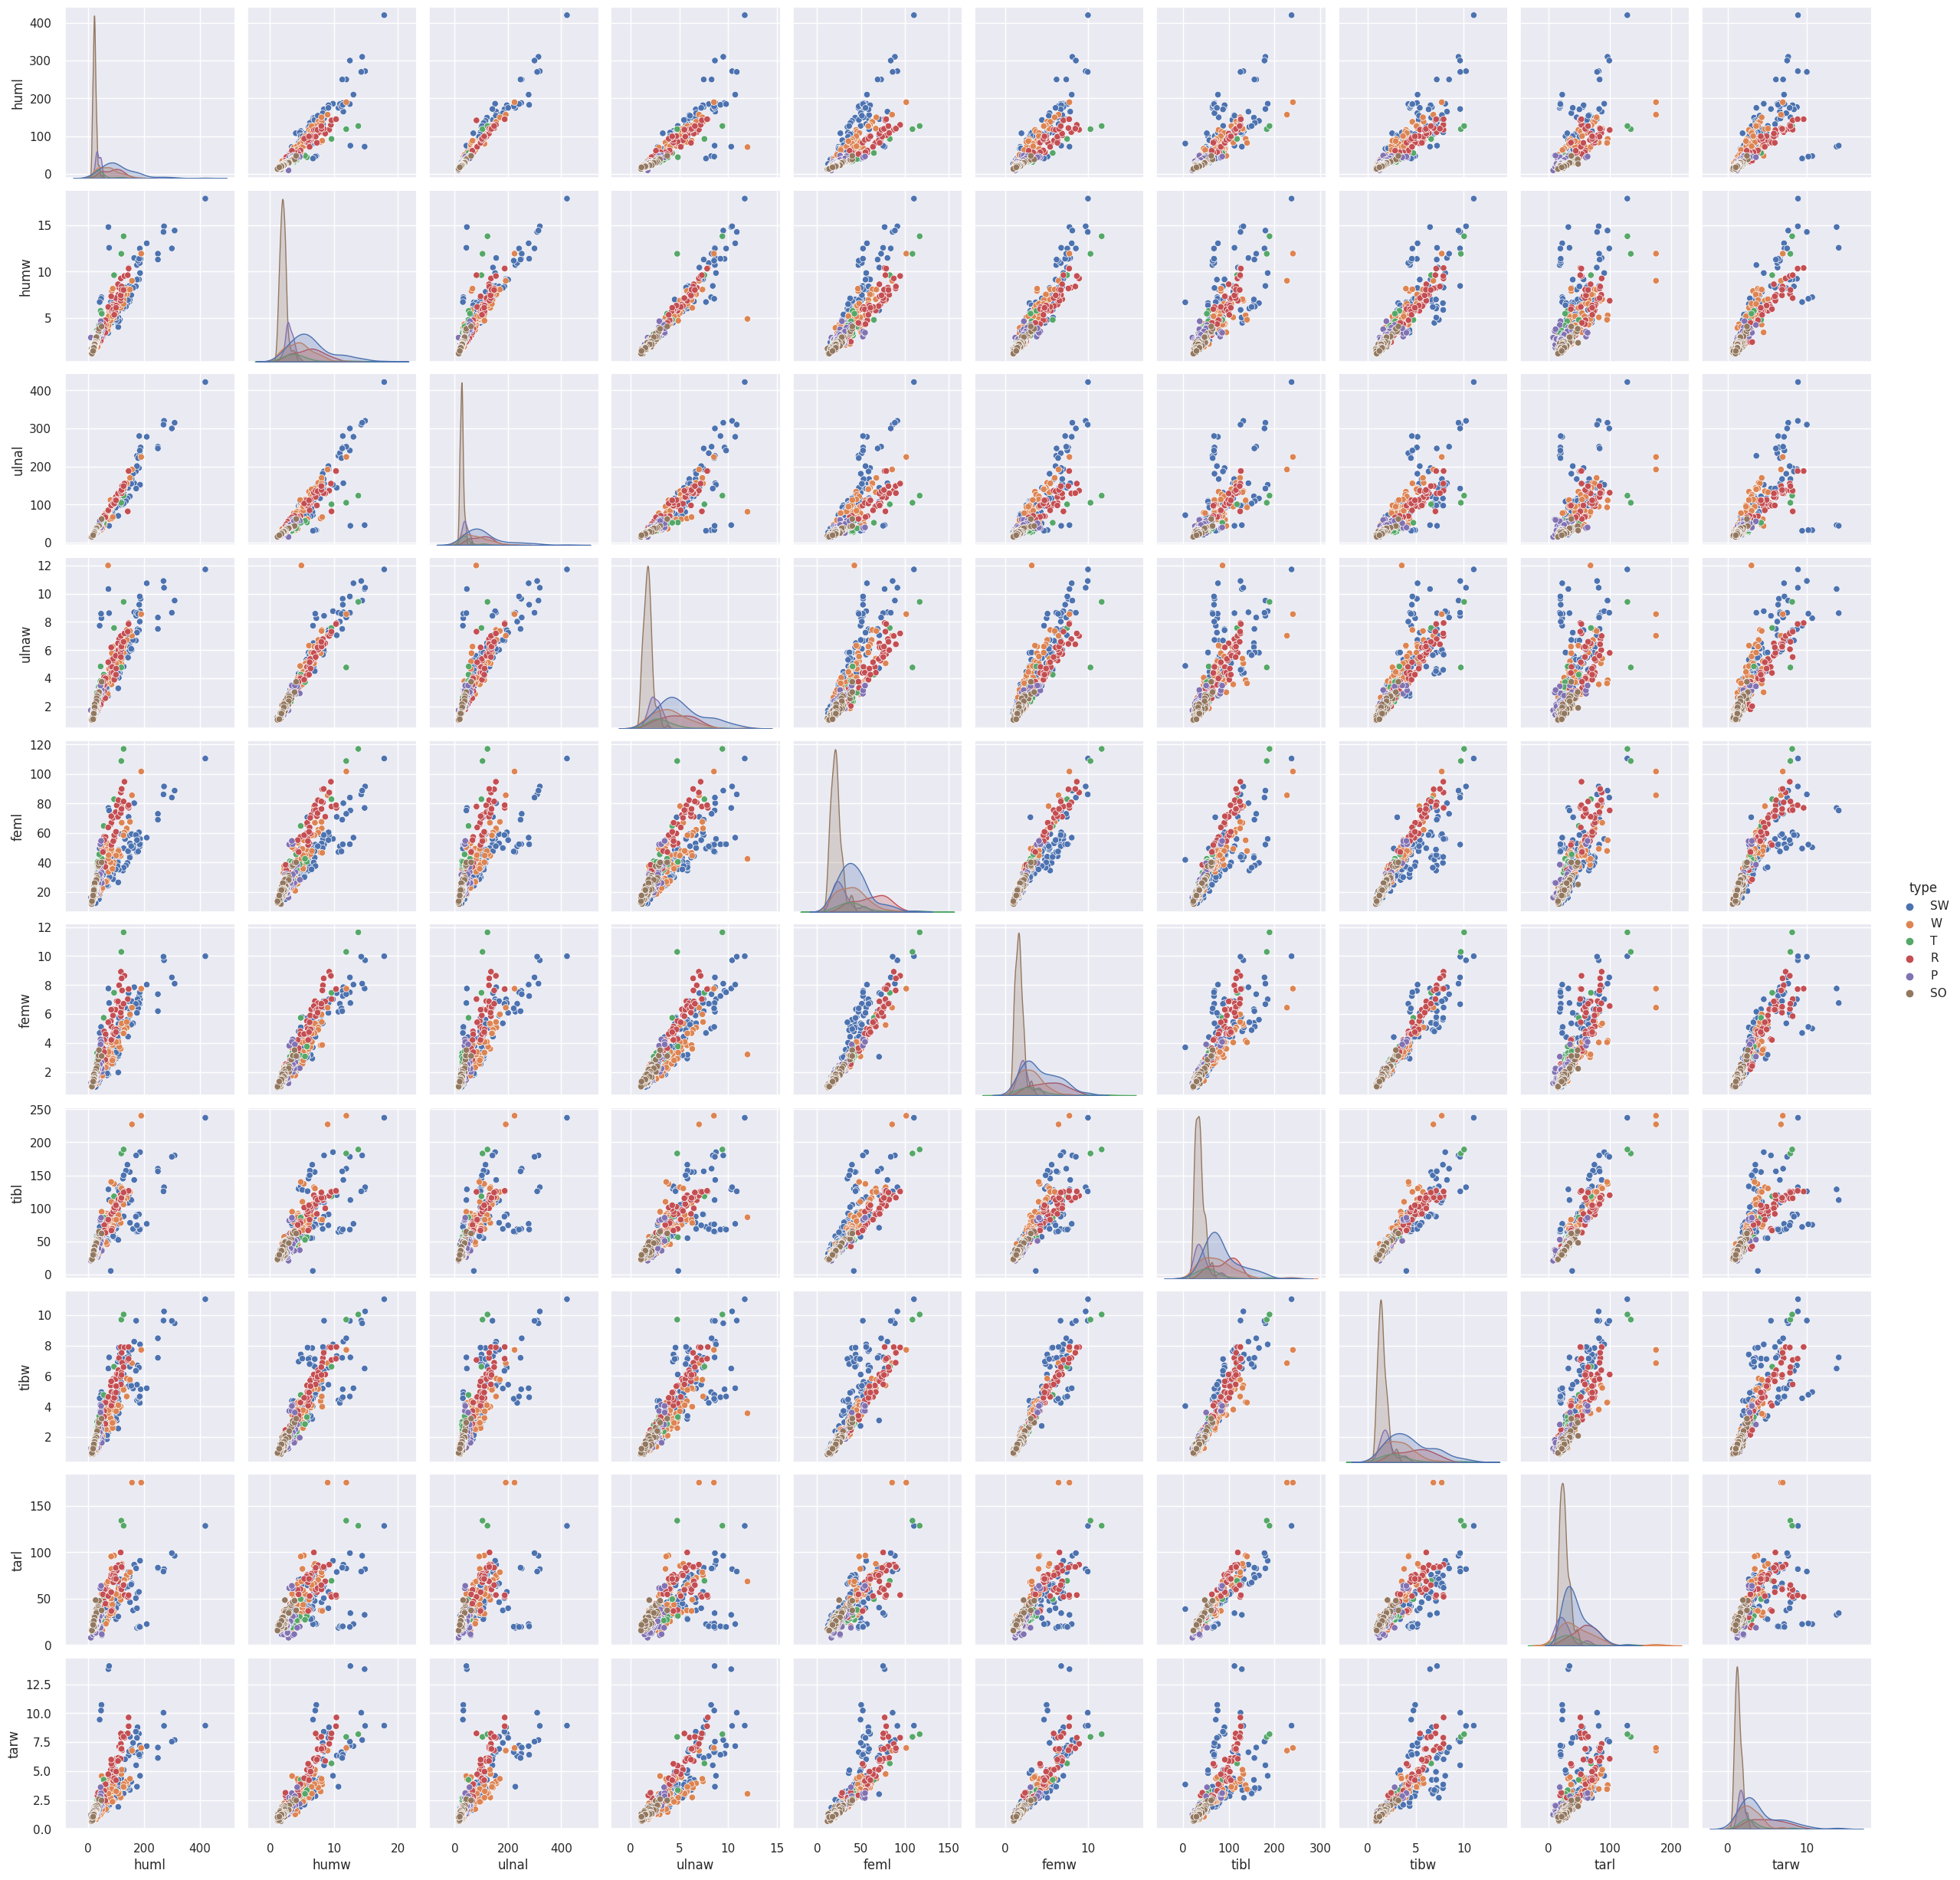

In [94]:
sns.pairplot(df, hue='type')
plt.show()

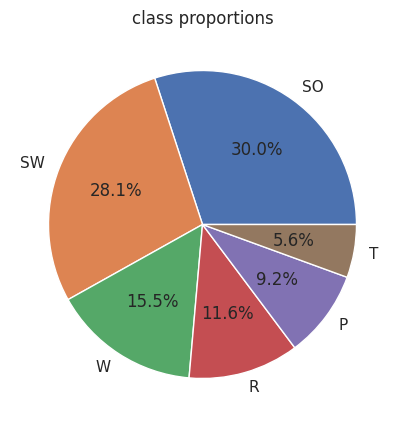

In [95]:
df['type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('')
plt.title('class proportions')
plt.show()


**Data Matrix:**

In [96]:
X = df.drop(columns=['type'])
X.head(10)

huml   humw   ulnal  ulnaw   feml  femw    tibl  tibw   tarl  tarw
0   80.78   6.68   72.01   4.88  41.81  3.70    5.50  4.03  38.70  3.84
1   88.91   6.63   80.53   5.59  47.04  4.30   80.22  4.51  41.50  4.01
2   79.97   6.37   69.26   5.28  43.07  3.90   75.35  4.04  38.31  3.34
3   77.65   5.70   65.76   4.77  40.04  3.52   69.17  3.40  35.78  3.41
4   62.80   4.84   52.09   3.73  33.95  2.72   56.27  2.96  31.88  3.13
5   61.92   4.78   50.46   3.47  49.52  4.41   56.95  2.73  29.07  2.83
6   79.73   5.94   67.39   4.50  42.07  3.41   71.26  3.56  37.22  3.64
7   86.98   5.68   74.52   4.55  44.46  3.78   76.02  3.81  37.94  3.81
8  118.20   7.82  116.64   6.13  59.33  5.45  110.00  5.58  61.62  4.37
9  145.00  10.42  144.00   7.05  70.96  7.44  120.00  7.31  78.67  6.34

In [97]:
X.describe().transpose()

count       mean        std    min    25%    50%    75%     max
huml   413.0  64.874867  54.056078   9.85  25.36  44.18  90.49  420.00
humw   413.0   4.381235   2.861460   1.14   2.20   3.50   5.82   17.84
ulnal  413.0  69.197409  58.929490  14.09  28.16  43.71  97.52  422.00
ulnaw  413.0   3.606538   2.190150   1.00   1.87   2.96   4.77   12.00
feml   413.0  36.822446  19.899356  11.83  21.35  31.09  47.09  117.07
femw   413.0   3.221768   2.021169   0.93   1.72   2.52   4.11   11.64
tibl   413.0  64.615642  37.977929   5.50  36.35  51.88  82.87  240.00
tibw   413.0   3.182324   2.084124   0.87   1.56   2.49   4.25   11.03
tarl   413.0  39.309806  23.272704   7.77  23.05  31.74  50.44  175.00
tarw   413.0   2.944891   2.194744   0.66   1.43   2.24   3.52   14.09

**Standardize the Data:**

In [98]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

huml      humw     ulnal     ulnaw      feml      femw      tibl  \
0  0.294591  0.804328  0.047786  0.582155  0.250943  0.236899 -1.558467   
1  0.445173  0.786834  0.192541  0.906727  0.514084  0.534117  0.411378   
2  0.279588  0.695861  0.001063  0.765012  0.314338  0.335971  0.282990   
3  0.236618  0.461430 -0.058402  0.531869  0.161887  0.147733  0.120067   
4 -0.038430  0.160520 -0.290655  0.056440 -0.144524 -0.248557 -0.220016   
5 -0.054729  0.139526 -0.318349 -0.062417  0.638863  0.588607 -0.202089   
6  0.275143  0.545405 -0.030708  0.408441  0.264025  0.093243  0.175165   
7  0.409426  0.454432  0.090431  0.431298  0.384275  0.276528  0.300653   
8  0.987674  1.203210  0.806050  1.153584  1.132441  1.103784  1.196469   
9  1.484057  2.112939  1.270897  1.574156  1.717591  2.089557  1.460099   

       tibw      tarl      tarw  
0  0.407223 -0.026234  0.408337  
1  0.637815  0.094224  0.485888  
2  0.412027 -0.043013  0.180243  
3  0.104571 -0.151855  0.212176  
4 -0.106805 -0.319637  0.084444  
5 -0.217297 -0.440526 -0.052412  
6  0.181435 -0.089905  0.317099  
7  0.301535 -0.058930  0.394651  
8  1.151843  0.959805  0.650116  
9  1.982935  1.693311  1.548803

In [99]:
X.describe().transpose()

count          mean       std       min       25%       50%       75%  \
huml   413.0 -2.064531e-16  1.001213 -1.019157 -0.731884 -0.383305  0.474437   
humw   413.0  2.064531e-16  1.001213 -1.134095 -0.763205 -0.308340  0.503418   
ulnal  413.0 -2.064531e-16  1.001213 -0.936276 -0.697226 -0.433031  0.481201   
ulnaw  413.0  6.881770e-17  1.001213 -1.191562 -0.793847 -0.295560  0.531869   
feml   413.0  6.881770e-17  1.001213 -1.257466 -0.778478 -0.288421  0.516600   
femw   413.0  1.032265e-16  1.001213 -1.135257 -0.743920 -0.347630  0.439998   
tibl   413.0 -1.376354e-16  1.001213 -1.558467 -0.745168 -0.335750  0.481240   
tibw   413.0 -2.408619e-16  1.001213 -1.110840 -0.779364 -0.332593  0.512911   
tarl   413.0 -6.881770e-17  1.001213 -1.356871 -0.699512 -0.325660  0.478831   
tarw   413.0 -1.720442e-16  1.001213 -1.042337 -0.691073 -0.321562  0.262357   

            max  
huml   6.577537  
humw   4.709166  
ulnal  5.994121  
ulnaw  3.837016  
feml   4.037562  
femw   4.170082  
tibl   4.623661  
tibw   3.770022  
tarl   5.837515  
tarw   5.084249

**Observations and variables:**

In [100]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots:**

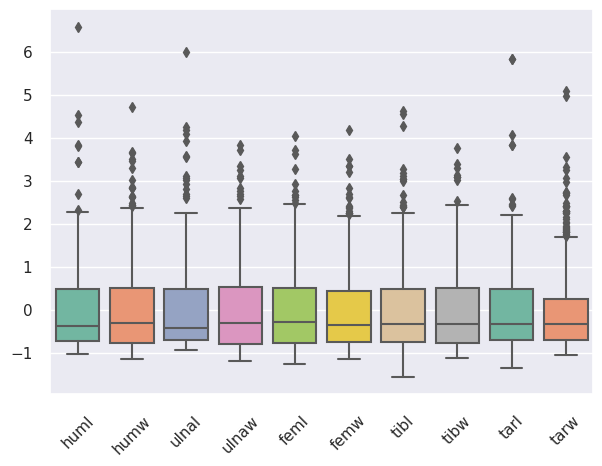

In [101]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

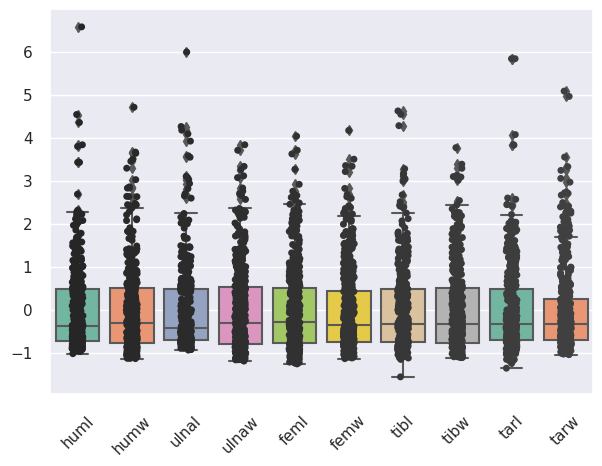

In [102]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix:**

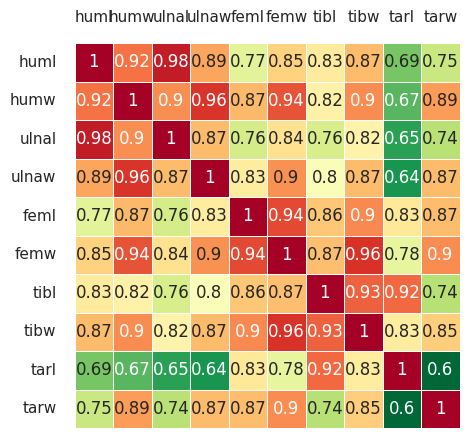

In [103]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA):**

Text(0, 0.5, '$Z_2$')

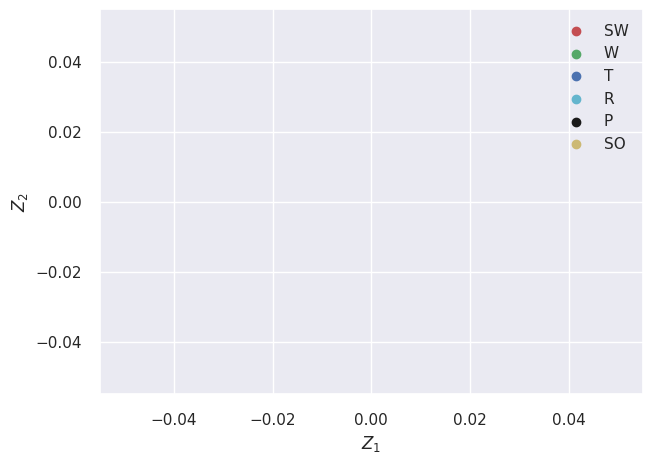

In [104]:
pca = PCA()
Z = pca.fit_transform(X)
y=df['type']
# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_SW = np.where(y == 0)
idx_W = np.where(y == 1)
idx_T = np.where(y == 2)
idx_R = np.where(y == 3)
idx_P = np.where(y == 4)
idx_SO = np.where(y == 5)

plt. figure()
plt.scatter(Z[idx_SW,0], Z[idx_SW,1], c='r', label='SW')
plt.scatter(Z[idx_W,0], Z[idx_W,1], c='g', label='W')
plt.scatter(Z[idx_T,0], Z[idx_T,1], c='b', label='T')
plt.scatter(Z[idx_R,0], Z[idx_R,1], c='c', label='R')
plt.scatter(Z[idx_P,0], Z[idx_P,1], c='k', label='P')
plt.scatter(Z[idx_SO,0], Z[idx_SO,1], c='y', label='SO')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors:**

[[ 0.31679323 -0.22801403 -0.47579624 -0.02762954 -0.205473    0.14466737
  -0.19273832 -0.15077461  0.32074065  0.62817417]
 [ 0.32916791 -0.26376568  0.04193145  0.06237177  0.20488572 -0.17027368
  -0.45112436  0.6866773   0.1857907  -0.18947111]
 [ 0.30831659 -0.30844415 -0.47937094 -0.4051338  -0.06400657  0.15213172
   0.21259001 -0.05376342 -0.31560934 -0.49085438]
 [ 0.31978823 -0.30300529  0.04446893  0.41420847  0.6232911  -0.16292071
   0.34037919 -0.3146609   0.0387464   0.03116784]
 [ 0.31995173  0.19333227  0.32300021 -0.56093795  0.20742907 -0.17898944
  -0.38032758 -0.45136673  0.12367972 -0.050312  ]
 [ 0.33281255  0.00399039  0.21893148 -0.14956618 -0.2362261  -0.46413245
   0.28776347  0.23326156 -0.4875299   0.41568375]
 [ 0.31509312  0.39073624 -0.15574739  0.4669284  -0.03214099  0.15986956
  -0.43283444 -0.14813634 -0.51513993 -0.0671688 ]
 [ 0.33098522  0.12936364  0.06287433  0.28899026 -0.56136715 -0.29803072
   0.17523392 -0.15125399  0.43152231 -0.37748337]


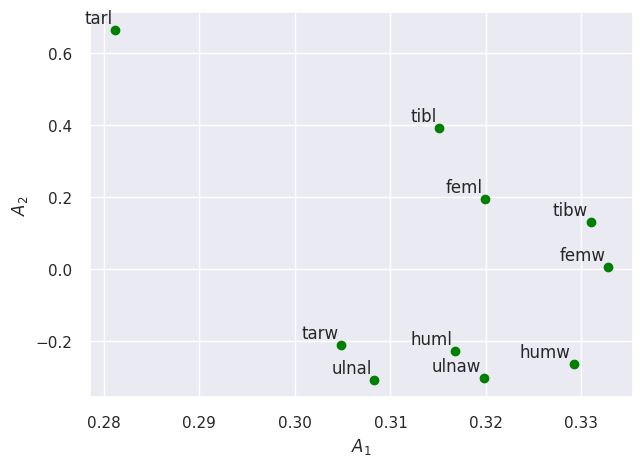

In [105]:
A = pca.components_.T
print(A)

plt.scatter(A[:,0],A[:,1],c='green')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

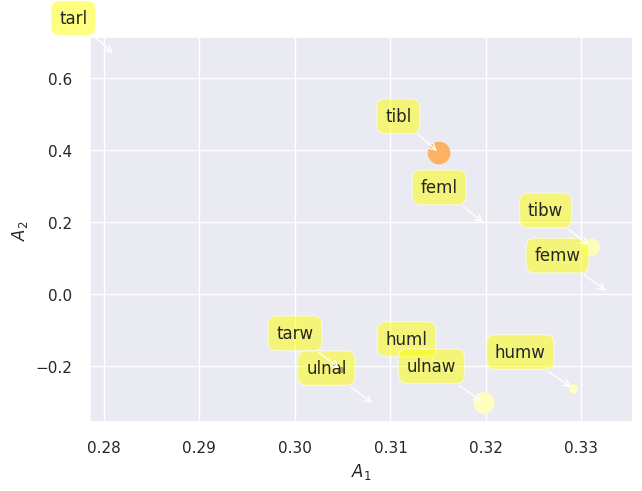

In [106]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot and Eigenvalues:**

[8.56351978e+00 6.56872967e-01 4.26804333e-01 1.24448118e-01
 9.06731644e-02 7.07107615e-02 3.64163427e-02 2.84936590e-02
 1.90470151e-02 7.28570639e-03]


Text(0, 0.5, 'Explained variance')

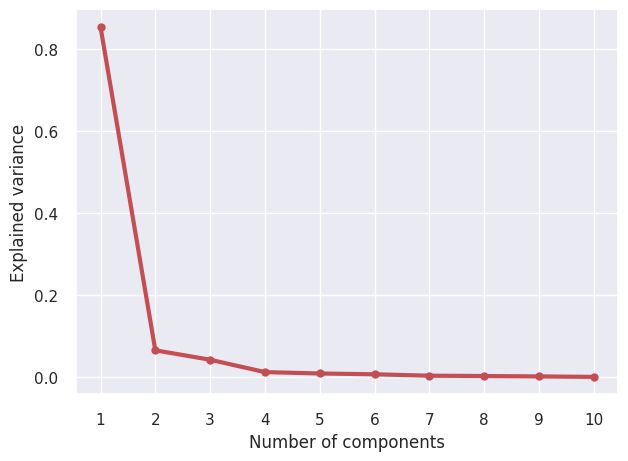

In [107]:
#Eigenvalues
Lambda = pca.explained_variance_
print(Lambda)

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained Variance:**

Text(0, 0.5, 'Cumulative explained variance')

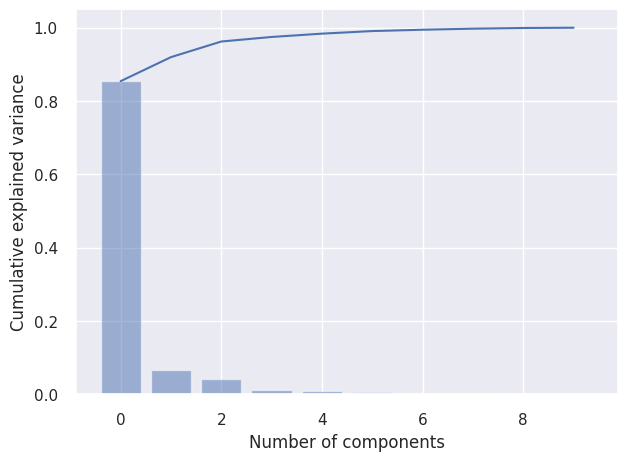

In [108]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot:**

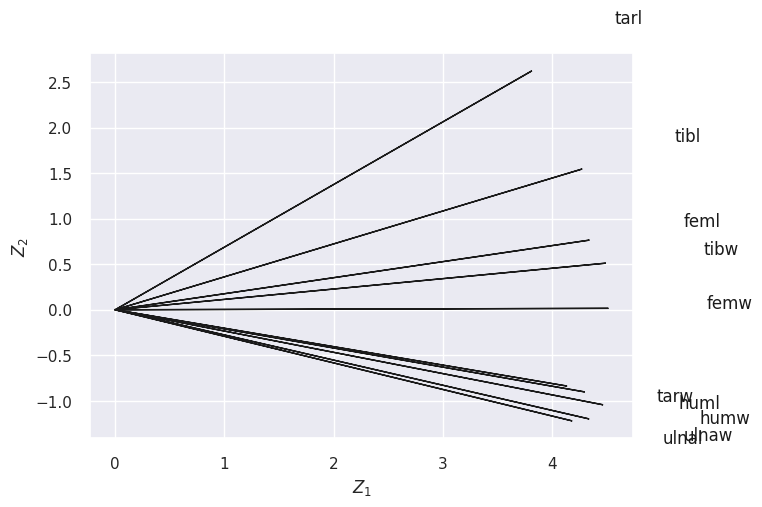

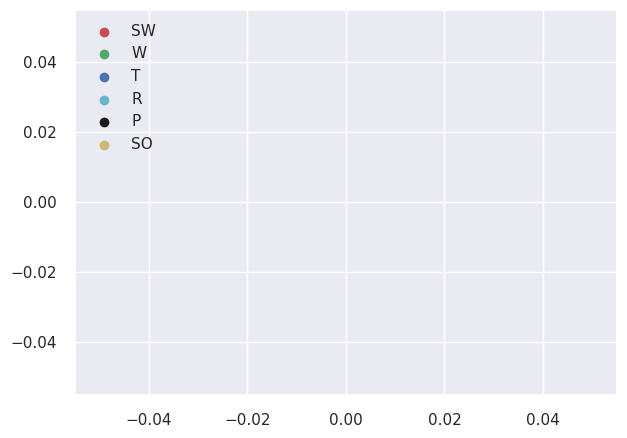

In [109]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')


plt. figure()
plt.scatter(Z[idx_SW,0], Z[idx_SW,1], c='r', label='SW')
plt.scatter(Z[idx_W,0], Z[idx_W,1], c='g', label='W')
plt.scatter(Z[idx_T,0], Z[idx_T,1], c='b', label='T')
plt.scatter(Z[idx_R,0], Z[idx_R,1], c='c', label='R')
plt.scatter(Z[idx_P,0], Z[idx_P,1], c='k', label='P')
plt.scatter(Z[idx_SO,0], Z[idx_SO,1], c='y', label='SO')

plt.legend(loc='upper left')

# **Using PCA Libraries**

In [110]:
!pip install pca

In [111]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [10] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components:**

In [112]:
out['PC']

PC1       PC2       PC3
0    0.478947 -1.081125  0.535761
1    1.606946 -0.338792  0.288401
2    1.043383 -0.320126  0.197379
3    0.574320 -0.372115  0.179899
4   -0.328672 -0.319613  0.200091
..        ...       ...       ...
408 -2.791882  0.066598  0.001189
409 -2.724960  0.101722 -0.036433
410 -2.672845  0.114386  0.021590
411 -2.547344  0.198200 -0.020948
412 -2.936440  0.089314 -0.059944

[413 rows x 3 columns]

**Scatter Plot:**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [97.47%] of the variance'}, xlabel='PC1 (85.4% expl.var)', ylabel='PC2 (6.55% expl.var)'>)

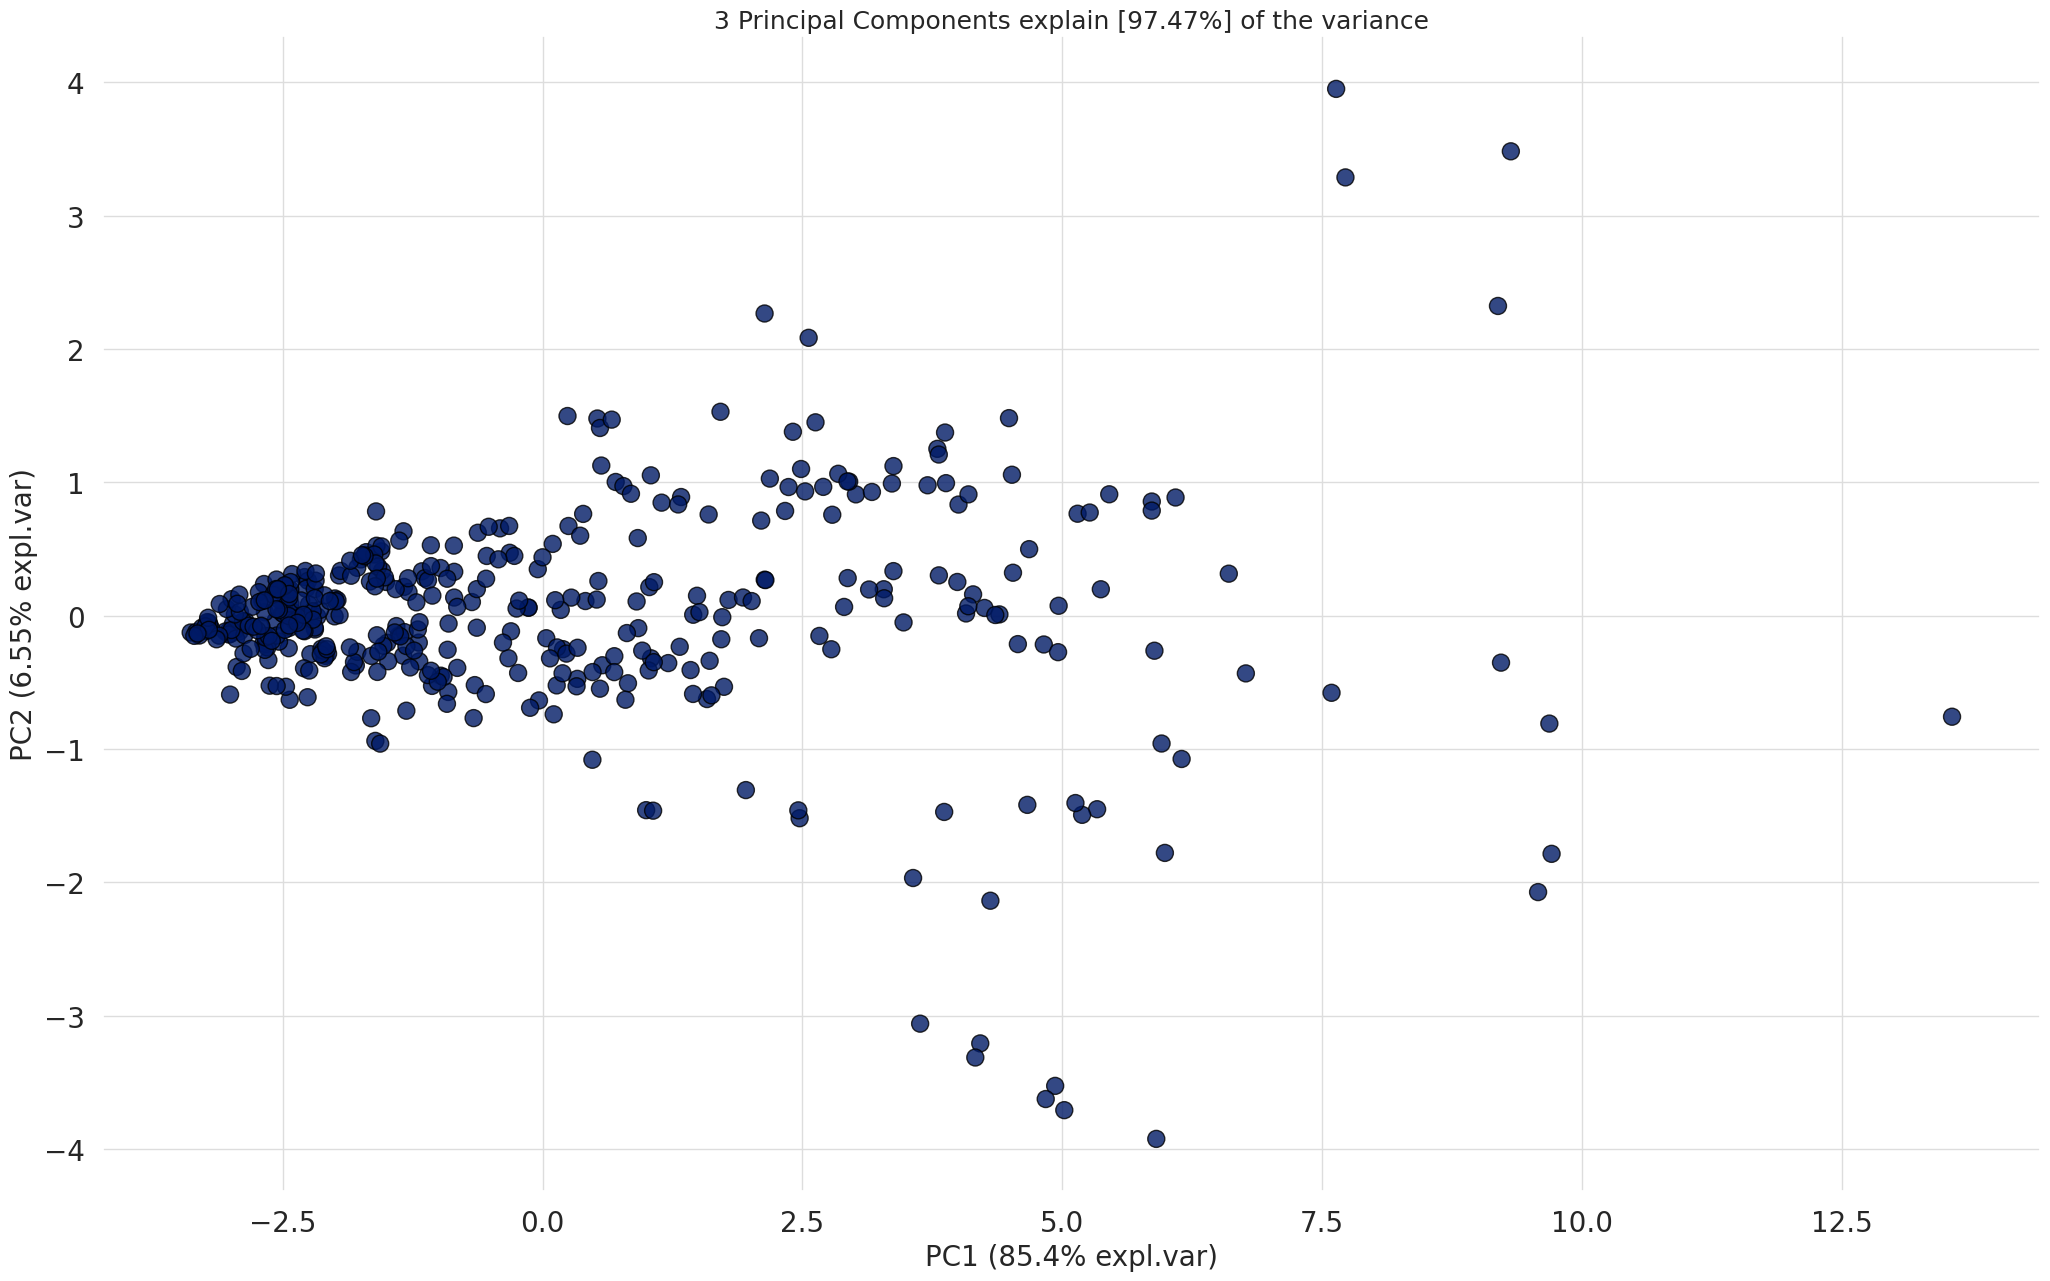

In [113]:
model.scatter(label=True, legend=False)

**Eigenvectors:**

In [114]:
A = out['loadings'].T

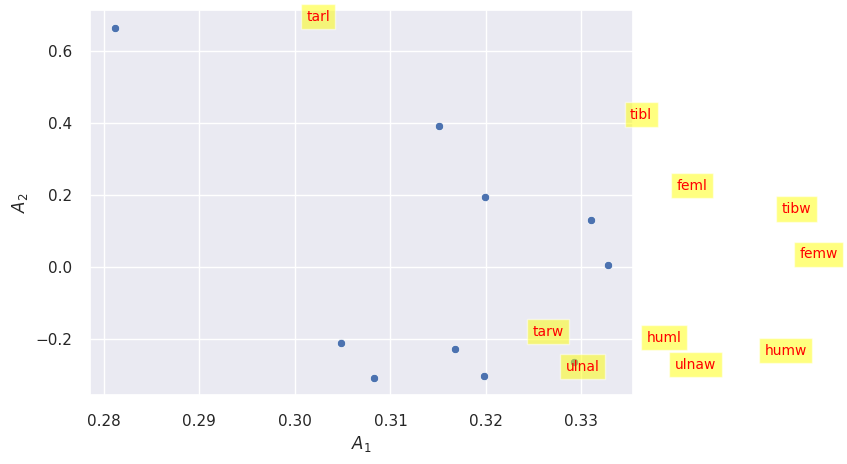

In [115]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot:**

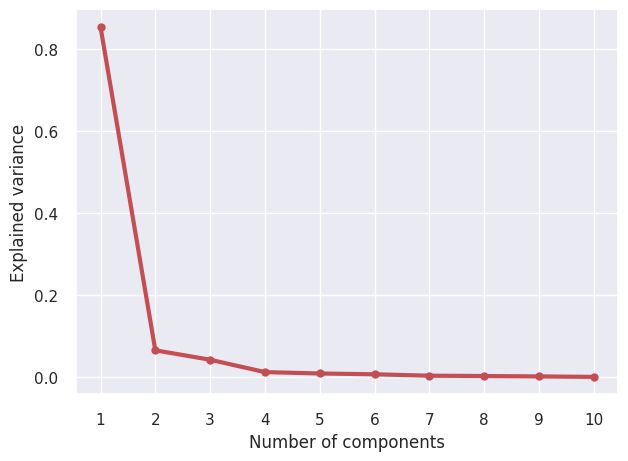

In [116]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot:**

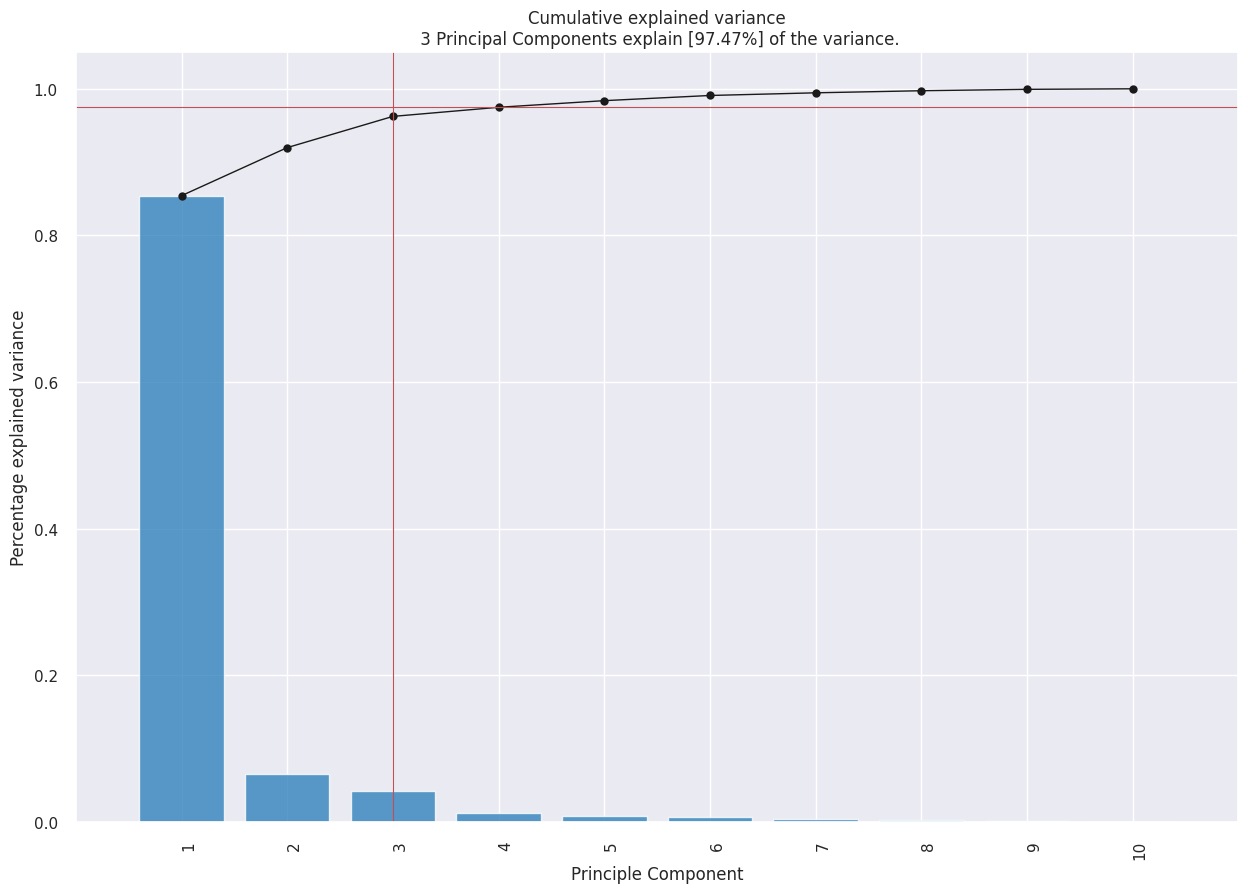

In [117]:
model.plot();

**Biplot:**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [97.47%] of the variance'}, xlabel='PC1 (85.4% expl.var)', ylabel='PC2 (6.55% expl.var)'>)

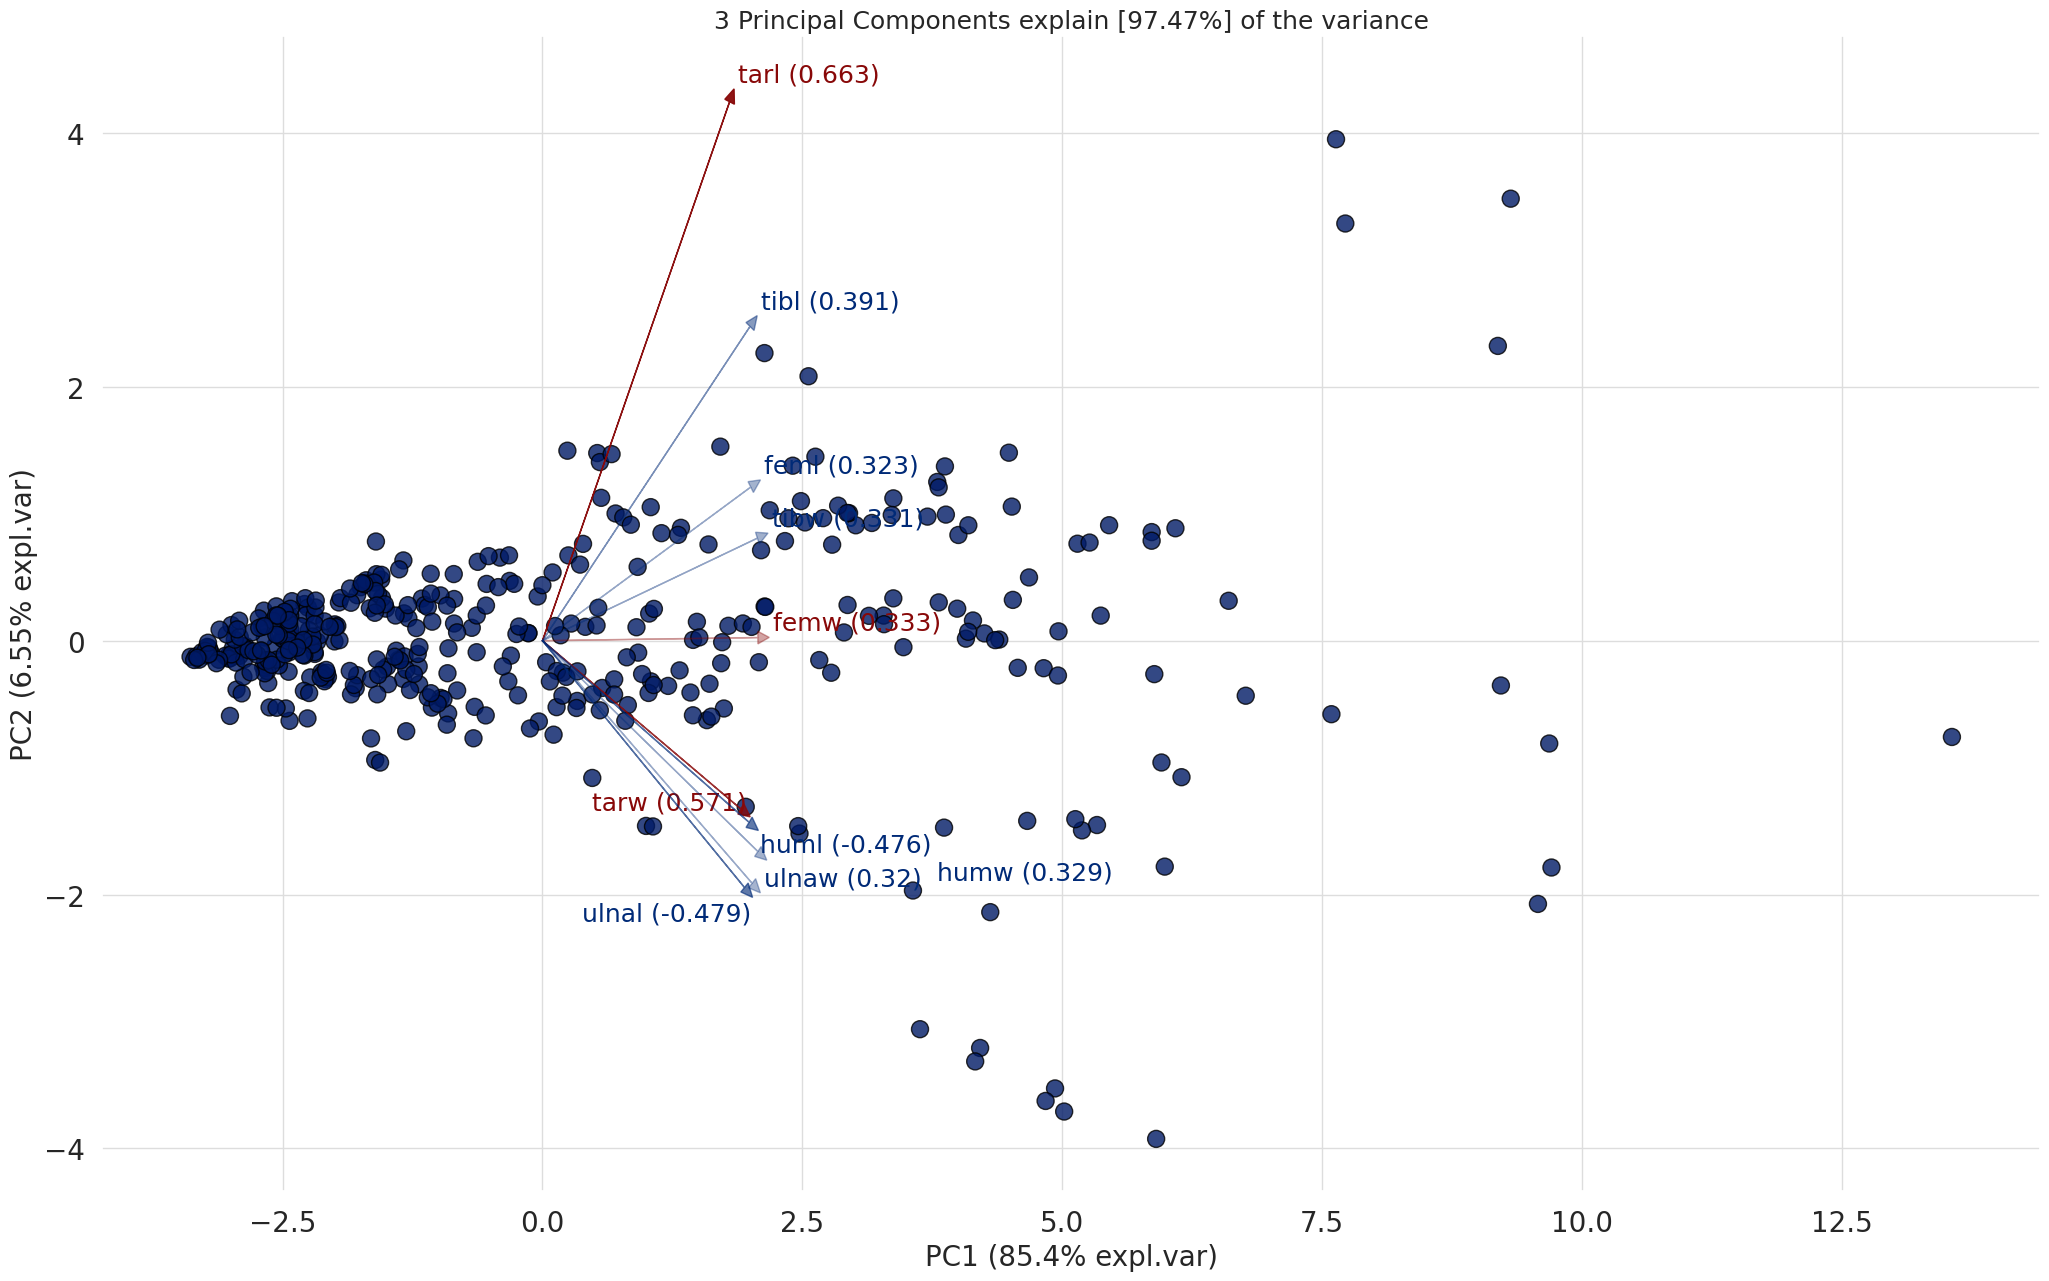

In [118]:
model.biplot(label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '3 Principal Components explain [97.47%] of the variance'}, xlabel='PC1 (85.4% expl.var)', ylabel='PC2 (6.55% expl.var)', zlabel='PC3 (4.25% expl.var)'>)

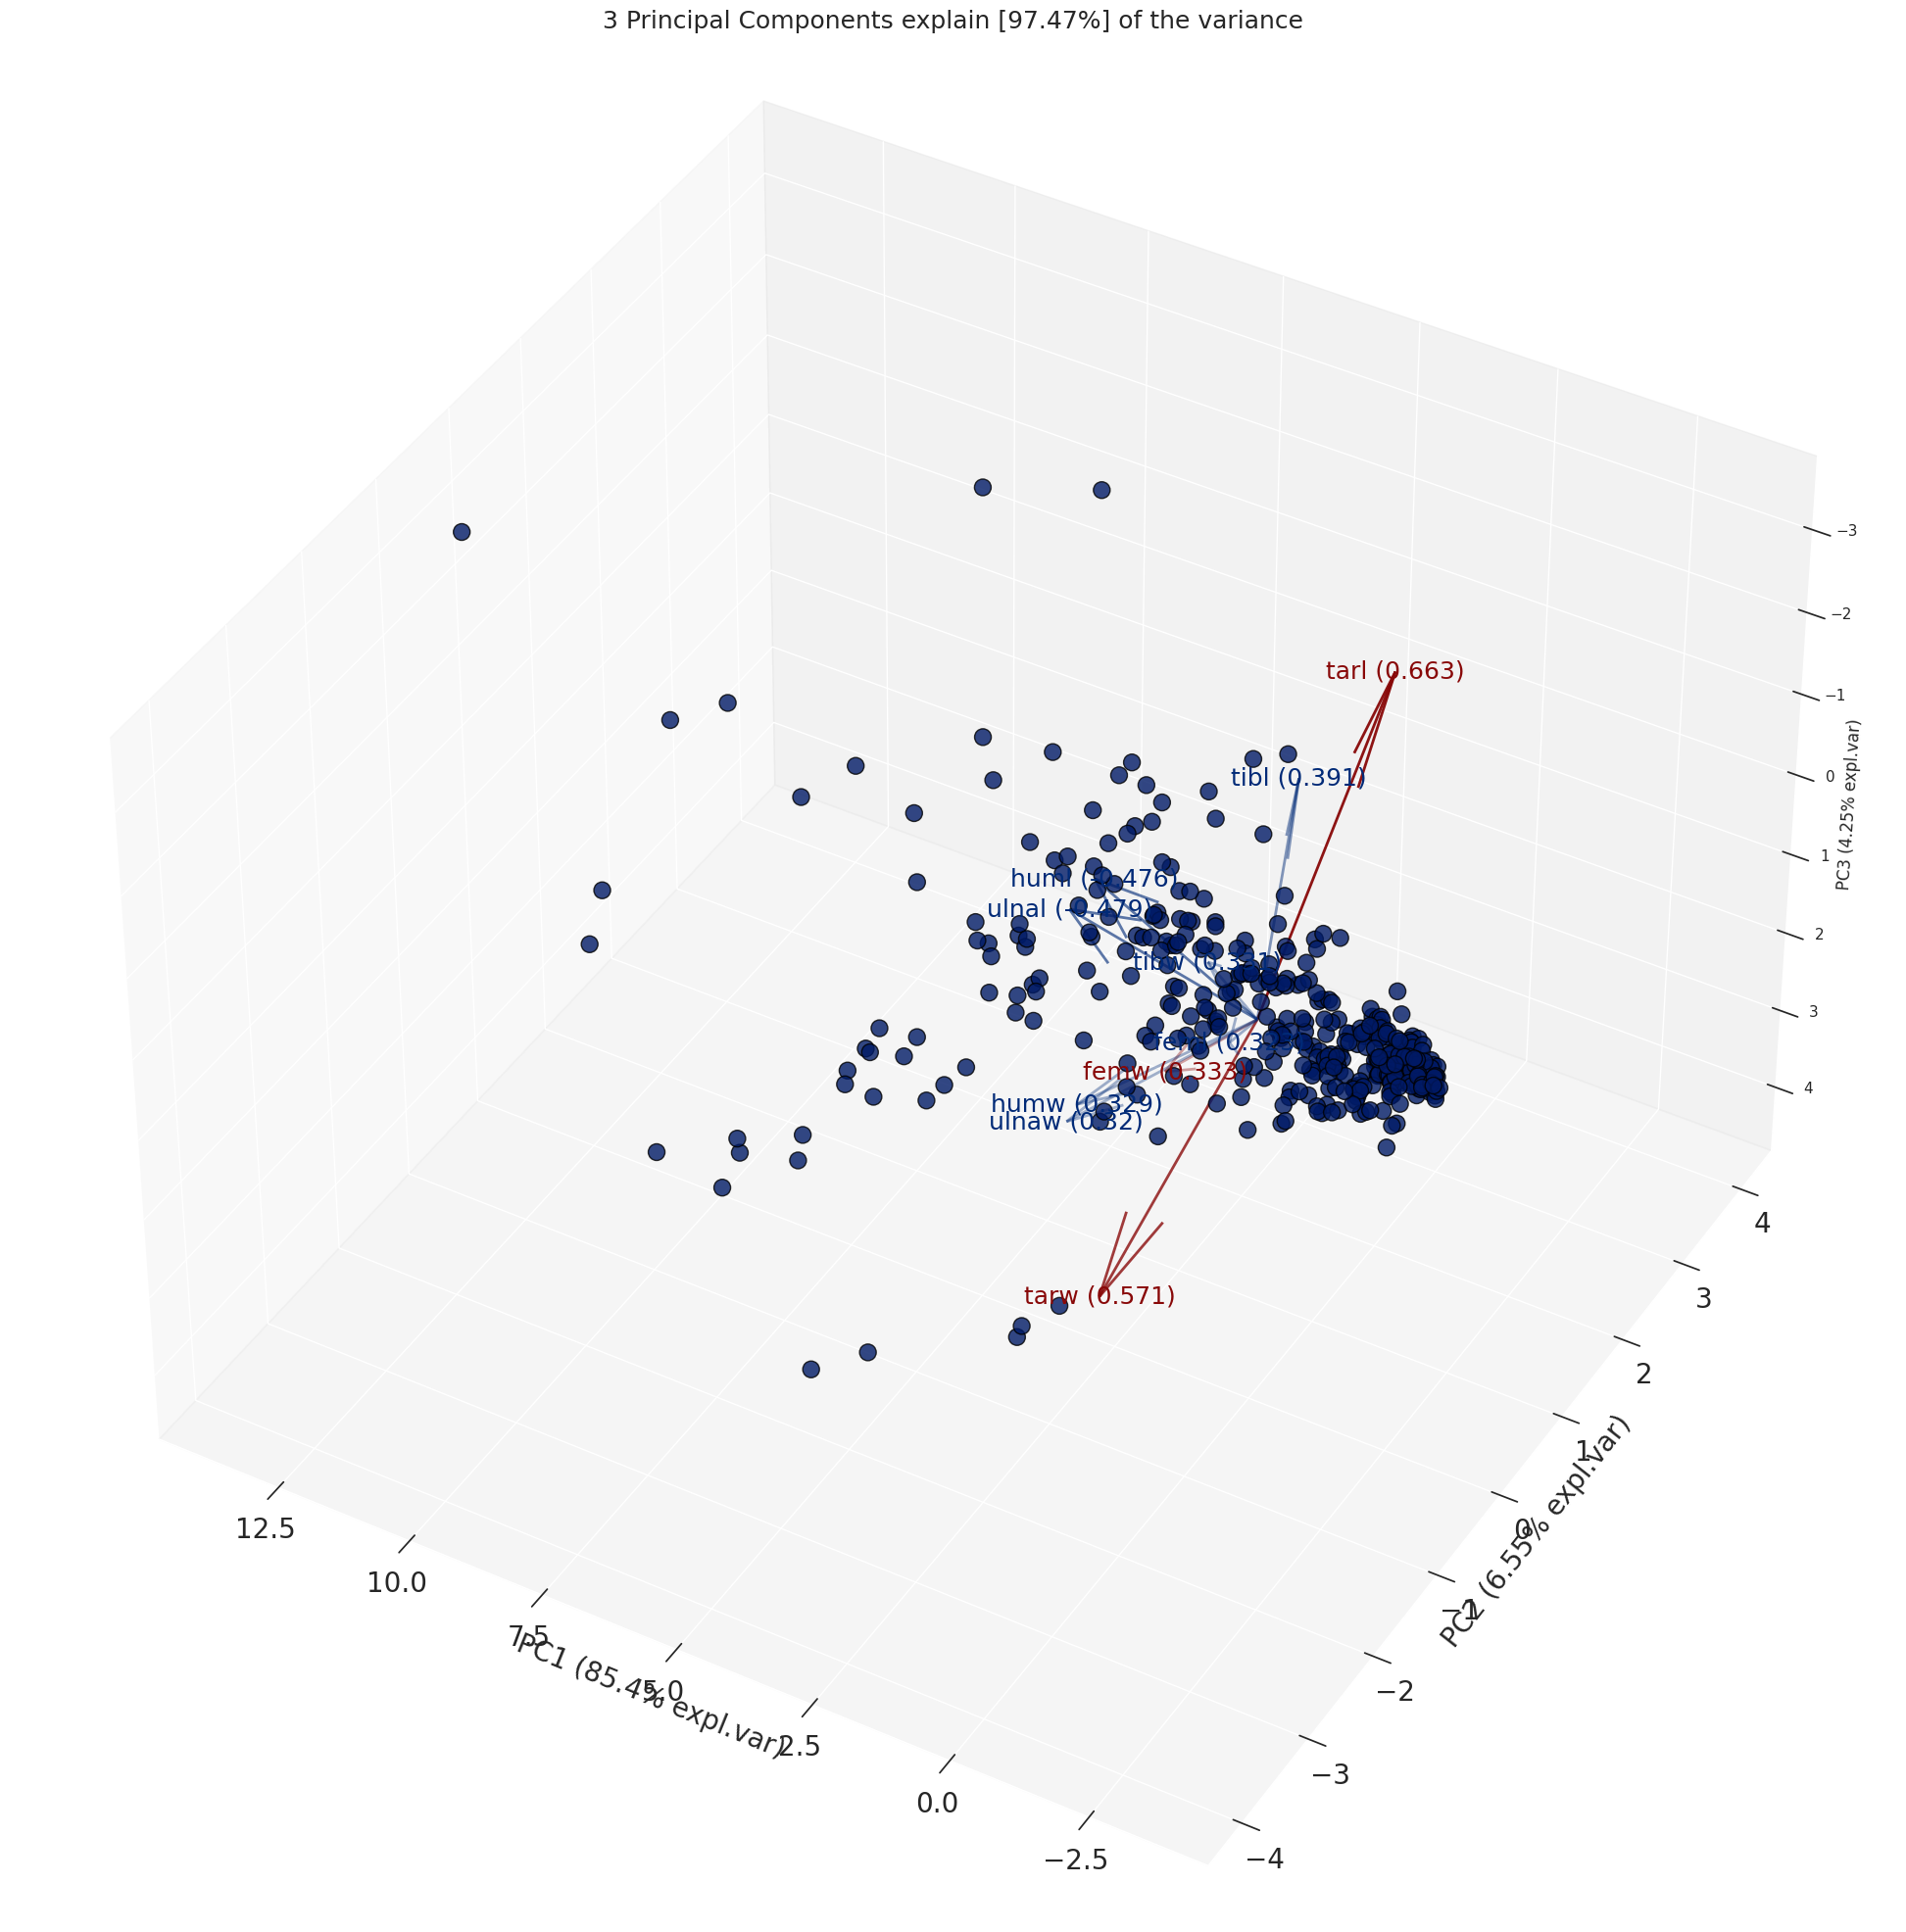

In [119]:
model.biplot3d(legend=False)

# **Classification:**

In [120]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (372, 11)
Unseen Data For Predictions: (41, 11)


In [121]:
from pycaret.classification import setup, compare_models, create_model,tune_model,evaluate_model
clf = setup(data=data, target='type', train_size=0.7, session_id=123)

After the successful execution of the setup, it displays the information grid, which includes many crucial pieces of information. The majority of the information pertains to the pre-processing pipeline, which is established during the execution of the setup phase. Most of these features are outside the scope of this lesson. However, it is crucial to notice a few significant points at this stage:

**session_id**: A pseudo-random number that is used as a seed in all functions to ensure repeatability at a later time. If a session_id is not provided, a randomly generated number is automatically assigned and disseminated to all functions. The session_id is assigned as 123 in this experiment to ensure future repeatability.

**Target Type:** Binary or Multiclass. The Target type is automatically identified and shown. The experimental procedure remains the same for both Binary and Multiclass tasks. All functionalities are indistinguishable.

**Original Data :** Displays the original shape of the dataset. In this experiment (372,11) means 372 samples and 11 features including the class column.

**Numeric Features :** The number of features inferred as numeric. In this dataset, 10 features are inferred as numeric.

**Categorical Features :** The number of features inferred as categorical. In this dataset, there are no categorical features.

**Transformed Train Set :** Displays the shape of the transformed training set. Notice that the original shape of (372, 11) is transformed into (260, 11) for the transformed train set.

**Transformed Test Set :** Displays the shape of the transformed test/hold-out set(112,11).

**Comparing All Models:**

In [122]:
 #show the best model and their statistics
 best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [123]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Create the Models:**

The three best models are Logistic Regression, Extra trees Classifier and Quadratic Discriminant Analysis respectively.

**Create Logistic Regression Model:**

In [124]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Logistic Regression Model:**

In [125]:
tuned_lr = tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Logistic Regression Model:**

In [126]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create ET Classifier:**

In [127]:
et = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [130]:
#trained model object is stored in the variable 'dt'.
et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [132]:
tuned_et = tune_model(et)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [133]:
#tuned model object is stored in the variable 'tuned_dt'.
tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

**Evaluate ET Model:**

In [134]:
!pip install statsmodels --upgrade

In [135]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Quadratic Discriminant Analysis Model:**

In [136]:
qda = create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune the Model:**

In [137]:
tuned_qda = tune_model(qda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate QDA Model:**

In [138]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Classification and Principal Component Analysis(PCA)**

In [139]:
clf_pca = setup(data=data, target='type', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [140]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [144]:
best_model_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

**Tune the Best Model:**

In [145]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [146]:
tuned_best_model_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

**Evaluate the Best Model:**

In [147]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Explainable AI with Shapley values**

Model interpretability is an important metric in the context of ML. There are several ways of enhancing the explainability of a model and feature importance is one of them.

In [148]:
!pip install shap

In [149]:
print("Numpy version: ", np.__version__)

Numpy version:  1.23.5


In [150]:
pip install numpy==1.23.5

In [151]:
import shap

In [152]:
et_pca = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [153]:
tuned_et_pca = tune_model(et_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**SHAP Summary Plot:**

 in order to get an overview of the most important features on the PCs, we use the SHAP values by importing the open source "shap" library of Python.

In [ ]:
interpret_model(tuned_et_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction:**

In [ ]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

**Visualize many predictions:**

In [ ]:
interpret_model(tuned_et_pca, plot='reason')